In [1]:
import glob
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


In [2]:
model_loc = f"/glade/work/schreck/repos/HOLO/clean/holodec-ml/results/unet_const_noisy_no_phase/"
model_save = "/glade/scratch/ggantos/holodec/models/unet_const_noisy_no_phase/"


In [3]:
real = 'synthetic' #real
h_idx = 0


In [4]:
objects_pred = np.load(f"{model_save}inference/{real}/objects_pred_{h_idx}.npy", allow_pickle=True)
objects_true = np.load(f"{model_save}inference/{real}/objects_true_{h_idx}.npy", allow_pickle=True)


In [5]:
ds = xr.open_dataset("/glade/p/cisl/aiml/ai4ess_hackathon/holodec/synthetic_holograms_500particle_gamma_4872x3248_training.nc")

# define dataset attributes
dx = ds.attrs['dx']      # horizontal resolution
dy = ds.attrs['dy']      # vertical resolution
Nx = int(ds.attrs['Nx']) # number of horizontal pixels
Ny = int(ds.attrs['Ny']) # number of vertical pixels
zMin = ds.attrs['zMin']  # minimum z in sample volume
zMax = ds.attrs['zMax']
dz = (zMax - zMin) / 1000
ds["d"].attrs


{'longname': 'Particle Diameter', 'units': 'microns'}

In [6]:
(zMax - zMin) / dx

48648.64864864865

In [7]:
# define true particle coordinates
particle_idx = np.where(ds['hid'].values==h_idx+1)

x_part = ds['x'].values[particle_idx]
y_part = ds['y'].values[particle_idx]
z_part = ds['z'].values[particle_idx]
d_part = ds['d'].values[particle_idx]


In [8]:
z_file_indices = sorted([int(x.replace(".npz", "").split("_")[-1]) for x in glob.glob(f"{model_loc}/{real}/propagated/true_{h_idx}_*")])
print(f"z_file_indices range from {min(z_file_indices)} to {max(z_file_indices)}.")


z_file_indices range from 14072 to 157928.


In [9]:
# TODO fill np.zeroes instead of lists

z_true = []
x_true = []
y_true = []
d_true = []

for obj in objects_true:
    z_true.append(z_file_indices[int(np.mean(obj[0].indices(10000)[:2]))])
    x_true.append(int(np.mean(obj[1].indices(10000)[:2])))
    y_true.append(int(np.mean(obj[2].indices(10000)[:2])))
    
#     d_z = (obj[0].indices(10000)[1] - l[0].indices(10000)[0]) * dz
    d_x = (obj[1].indices(10000)[1] - obj[1].indices(10000)[0]) * dx
    d_y = (obj[2].indices(10000)[1] - obj[2].indices(10000)[0]) * dy
    
    d_true.append(max(d_x, d_y) / 1e-6)

z_true = np.array(z_true)
x_true = np.array(x_true) * dx * 1e6
x_true = x_true - (max(x_true) - min(x_true)) / 2
y_true = np.array(y_true) * dy * 1e6
y_true = y_true - (max(y_true) - min(y_true)) / 2
d_true = np.array(d_true)


In [10]:
# TODO fill np.zeroes instead of lists

z_pred = []
x_pred = []
y_pred = []
d_pred = []

for obj in objects_pred:
    z_pred.append(z_file_indices[int(np.mean(obj[0].indices(10000)[:2]))])
    x_pred.append(int(np.mean(obj[1].indices(10000)[:2])))
    y_pred.append(int(np.mean(obj[2].indices(10000)[:2])))
    
#     d_z = (obj[0].indices(10000)[1] - l[0].indices(10000)[0]) * dz
    d_x = (obj[1].indices(10000)[1] - obj[1].indices(10000)[0]) * dx
    
    d_y = (obj[2].indices(10000)[1] - obj[2].indices(10000)[0]) * dy
    
    d_pred.append(max(d_x, d_y) / 1e-6)

z_pred = np.array(z_pred)
x_pred = np.array(x_pred) * dx * 1e6
x_pred = x_pred - (max(x_true) - min(x_true)) / 2
y_pred = np.array(y_pred) * dy * 1e6
y_pred = y_pred - (max(y_true) - min(y_true)) / 2
d_pred = np.array(d_pred)


In [11]:
print(max(z_part))
print(max(z_true))
print(max(z_pred))

print(min(z_part))
print(min(z_true))
print(min(z_pred))

157705.7
157496
157496
14232.336
14360
14360


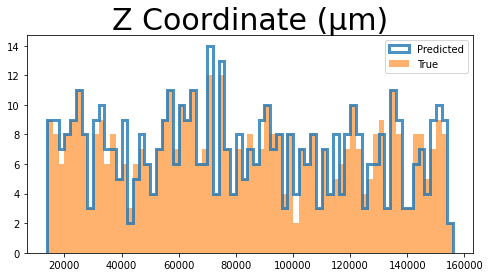

In [12]:
# predicted mask histogram (use step), axis labels, etc

plt.figure(figsize=(8,4))
plt.hist(z_pred, bins=np.arange(14000,158000,2000), alpha=0.8, label='Predicted', histtype='step', linewidth=3)
plt.hist(z_true, bins=np.arange(14000,158000,2000), alpha=0.6, label='True')
# plt.hist(z_part, bins=np.arange(14000,158000,2000), alpha=0.6, label='true')
# plt.xlabel('z-coordinate (µm)')
plt.title("Z Coordinate (µm)", fontsize=30)
# plt.xticks([])
# plt.yticks([])
plt.legend()
plt.savefig(f"{model_save}inference/hist_z_{h_idx}.png")
plt.show()


In [13]:
print(max(d_part))
print(max(d_true))
print(max(d_pred))

print(min(d_part))
print(min(d_true))
print(min(d_pred))

144.21223
118.4
115.44000000000001
4.626708
2.96
2.96


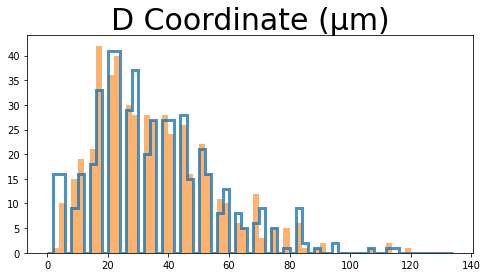

In [14]:
# predicted mask histogram (use step), axis labels, etc

plt.figure(figsize=(8,4))
plt.hist(d_pred, bins=np.arange(0,136,2), alpha=0.8, label='Predicted', histtype='step', linewidth=3)
plt.hist(d_true, bins=np.arange(0,136,2), alpha=0.6, label='True')
# plt.hist(d_part, bins=np.arange(0,136,2), alpha=0.6, label='true')
# plt.xlabel('diameter (µm)')
plt.title("D Coordinate (µm)", fontsize=30)
# plt.xticks([])
# plt.yticks([])
# plt.legend()
plt.savefig(f"{model_save}inference/hist_d_{h_idx}.png")
plt.show()


In [15]:
print(max(y_part))
print(max(y_true))
print(max(y_pred))

print(min(y_part))
print(min(y_true))
print(min(y_pred))

4793.7056
4808.52
4808.52
-4803.597
-4737.48
-4740.44


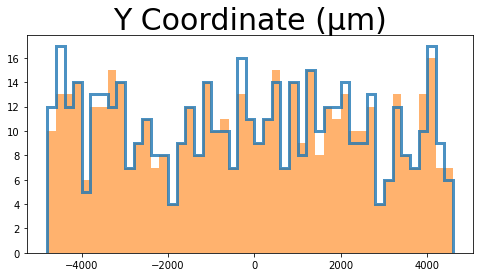

In [16]:
# predicted mask histogram (use step), axis labels, etc

plt.figure(figsize=(8,4))
plt.hist(y_pred, bins=np.arange(-4800,4800,200), alpha=0.8, label='Predicted', histtype='step', linewidth=3)
plt.hist(y_true, bins=np.arange(-4800,4800,200), alpha=0.6, label='True')
# plt.hist(y_part, bins=np.arange(-4800,4800,200), alpha=0.6, label='true')
# plt.xlabel('y-coordinate (µm)')
plt.title("Y Coordinate (µm)", fontsize=30)
# plt.xticks([])
# plt.yticks([])
# plt.legend()
plt.savefig(f"{model_save}inference/hist_y_{h_idx}.png")
plt.show()


In [17]:
# compute 10 histograms then average and put standard deviations on all the bins

In [18]:
print(max(x_part))
print(max(x_true))
print(max(x_pred))

print(min(x_part))
print(min(x_true))
print(min(x_pred))

7171.8496
7204.639999999999
7213.52
-7195.196
-7163.2
-7169.12


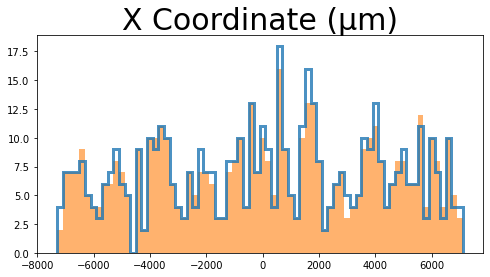

In [19]:
# predicted mask histogram (use step), axis labels, etc

plt.figure(figsize=(8,4))
plt.hist(x_pred, bins=np.arange(-7300,7300,200), alpha=0.8, label='Predicted', histtype='step', linewidth=3)
plt.hist(x_true, bins=np.arange(-7300,7300,200), alpha=0.6, label='True')
# plt.hist(x_part, bins=np.arange(-7300,7300,200), alpha=0.6, label='true')
# plt.xlabel('x-coordinate (µm)')
plt.title("X Coordinate (µm)", fontsize=30)
# plt.xticks([])
# plt.yticks([])
# plt.legend()
plt.savefig(f"{model_save}inference/hist_x_{h_idx}.png")
plt.show()


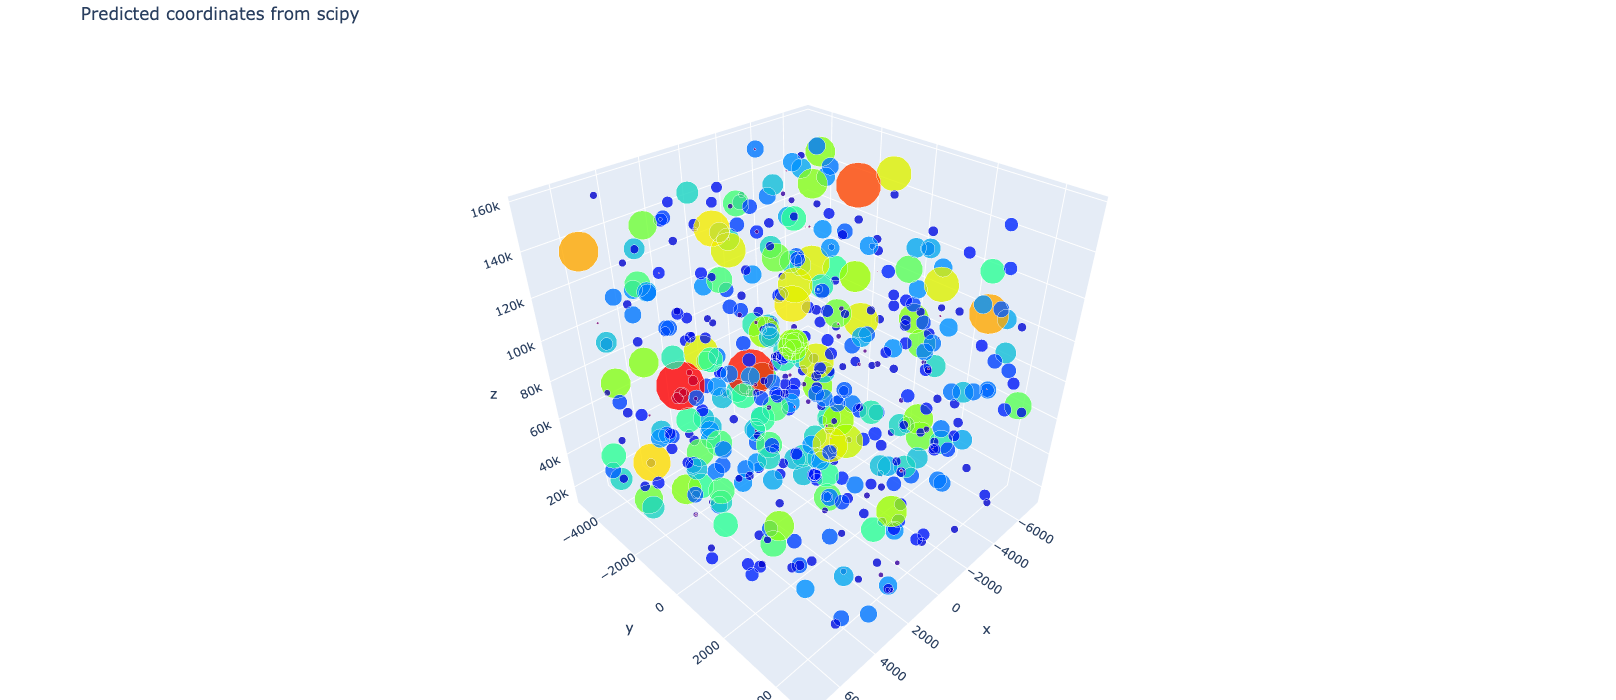

In [20]:
data = [go.Scatter3d(x=x_pred,
                     y=y_pred,
                     z=z_pred,
                     mode='markers',
                     marker=dict(size=d_pred/2,
                                 color=d_pred,
                                 colorscale='Rainbow',
                                 opacity=0.8),
                     text = [f"diameter: {d_pred_i}" for d_pred_i in d_pred])]

layout = go.Layout(title='Predicted coordinates from scipy',
                   autosize=True,
                   width=700,
                   height=700,
                   xaxis= go.layout.XAxis(linecolor = 'black',
                                          linewidth = 1,
                                          mirror = True),
                   yaxis= go.layout.YAxis(linecolor = 'black',
                                          linewidth = 1,
                                          mirror = True),
                   margin=go.layout.Margin(
                        l=0,
                        r=0,
                        b=0,
                        t=40
                   )
                   )

fig = go.Figure(data=data, layout=layout)
fig.update_layout(scene_aspectmode='manual',
                  scene_aspectratio=dict(x=1, y=1, z=1))
fig.update_layout(hovermode="x")
fig.show()


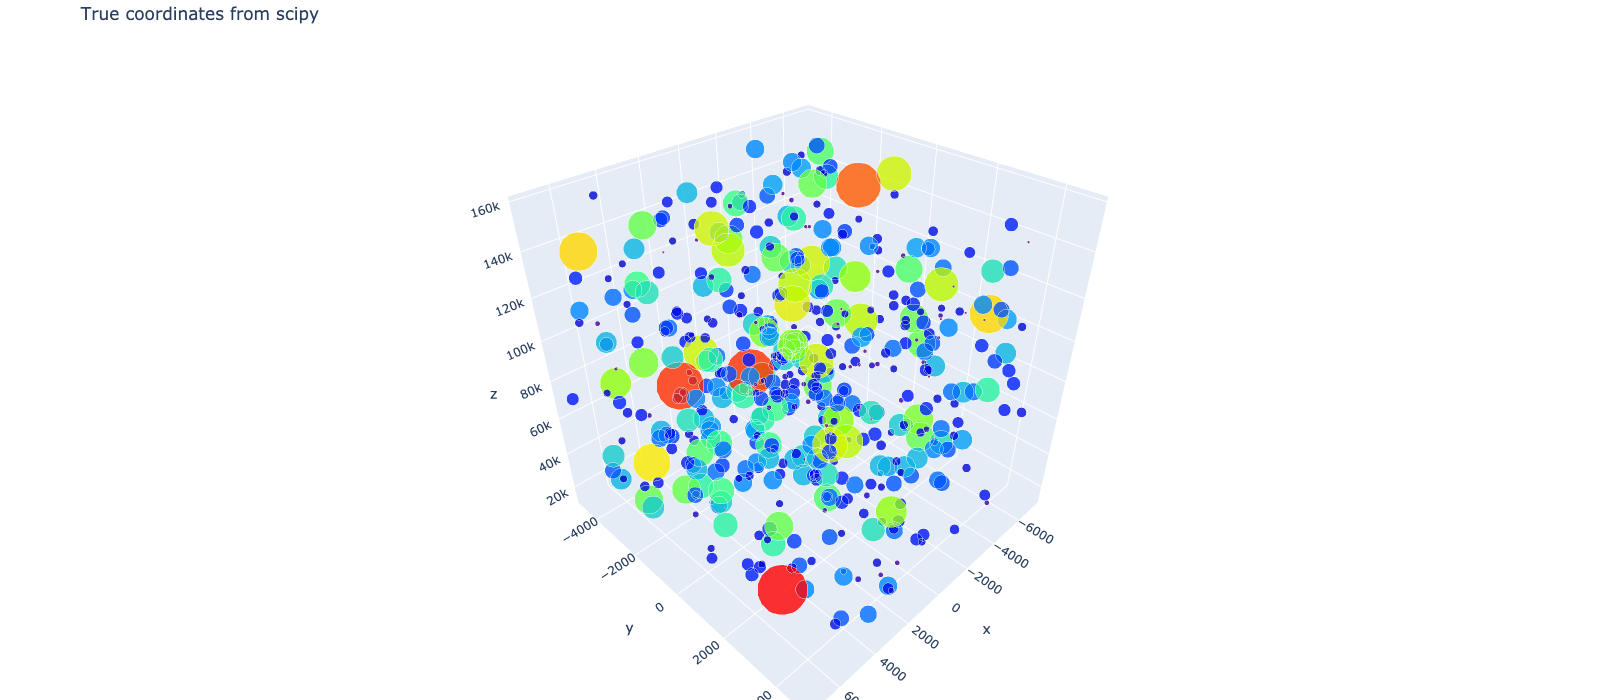

In [21]:
data = [go.Scatter3d(x=x_true,
                     y=y_true,
                     z=z_true,
                     mode='markers',
                     marker=dict(size=d_true/2,
                                 color=d_true,
                                 colorscale='Rainbow',
                                 opacity=0.8),
                     text = [f"diameter: {d_true_i}" for d_true_i in d_true])]

layout = go.Layout(title='True coordinates from scipy',
                   autosize=True,
                   width=700,
                   height=700,
                   xaxis= go.layout.XAxis(linecolor = 'black',
                                          linewidth = 1,
                                          mirror = True),
                   yaxis= go.layout.YAxis(linecolor = 'black',
                                          linewidth = 1,
                                          mirror = True),
                   margin=go.layout.Margin(
                        l=0,
                        r=0,
                        b=0,
                        t=40
                   )
                   )

fig = go.Figure(data=data, layout=layout)
fig.update_layout(scene_aspectmode='manual',
                  scene_aspectratio=dict(x=1, y=1, z=1))
fig.update_layout(hovermode="x")
fig.show()


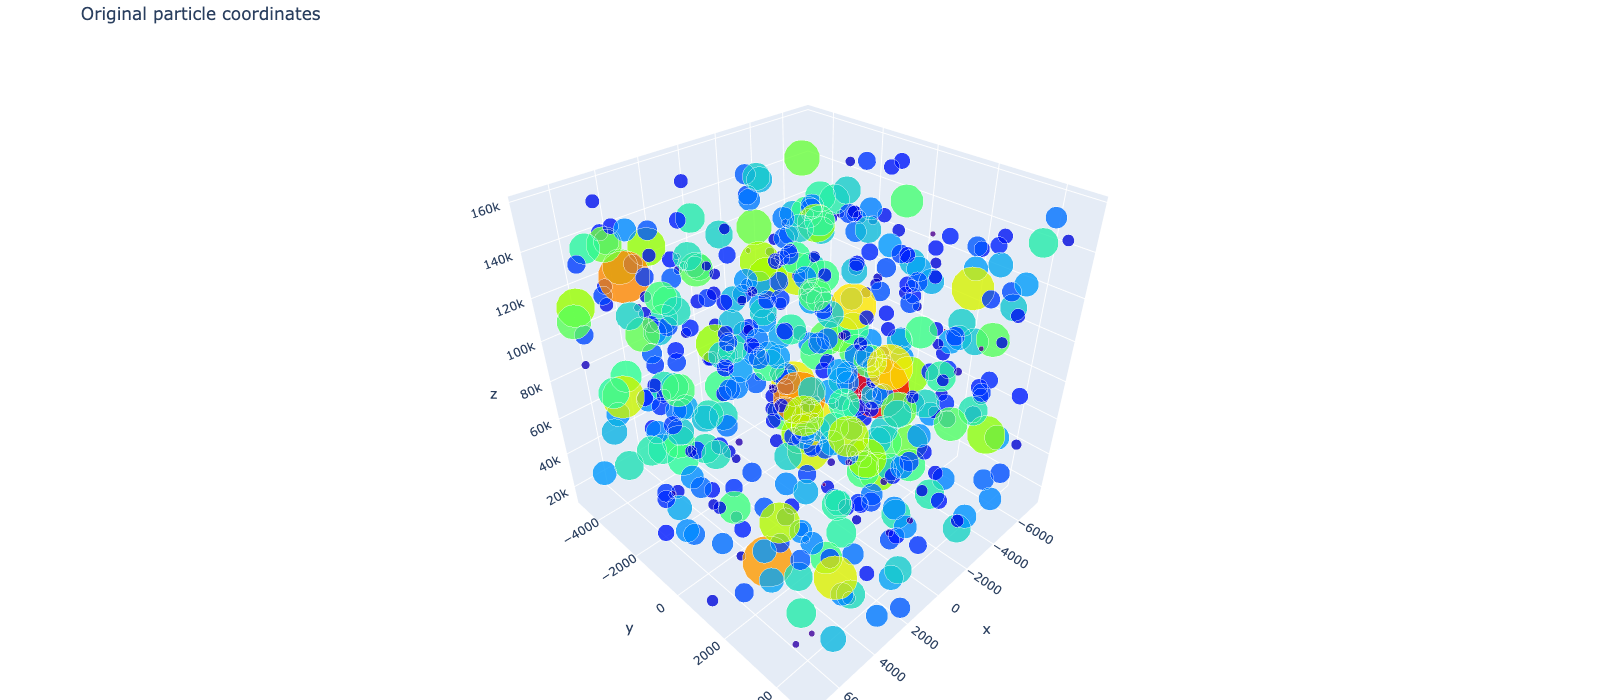

In [22]:
data = [go.Scatter3d(x=x_part,
                     y=y_part,
                     z=z_part,
                     mode='markers',
                     marker=dict(size=d_part/2,
                                 color=d_part,
                                 colorscale='Rainbow',
                                 opacity=0.8),
                     text = [f"diameter: {d_part_i}" for d_part_i in d_part])]

layout = go.Layout(title='Original particle coordinates',
                   autosize=True,
                   width=700,
                   height=700,
                   xaxis= go.layout.XAxis(linecolor = 'black',
                                          linewidth = 1,
                                          mirror = True),
                   yaxis= go.layout.YAxis(linecolor = 'black',
                                          linewidth = 1,
                                          mirror = True),
                   margin=go.layout.Margin(
                        l=0,
                        r=0,
                        b=0,
                        t=40
                   )
                   )

fig = go.Figure(data=data, layout=layout)
fig.update_layout(scene_aspectmode='manual',
                  scene_aspectratio=dict(x=1, y=1, z=1))
fig.update_layout(hovermode="x")
fig.show()


# Calculating the Euclidian Distance

In [24]:
def normalize(x):
    return (x - x.min()) / (x.max() - x.min())

In [61]:
mae_x = np.abs(normalize(x_pred).reshape(-1,1) - normalize(x_part).reshape(1,-1))
mae_y = np.abs(normalize(y_pred).reshape(-1,1) - normalize(y_part).reshape(1,-1))
mae_z = np.abs(normalize(z_pred).reshape(-1,1) - normalize(z_part).reshape(1,-1))
mae_d = np.abs(normalize(d_pred).reshape(-1,1) - normalize(d_part).reshape(1,-1))
mae_total = mae_x + mae_y + mae_z + mae_d


In [53]:
d_x = (normalize(x_pred).reshape(-1,1) - normalize(x_part).reshape(1,-1)) ** 2
d_x = np.where(d_x > d_x.mean(), 1, d_x)

d_y = (normalize(y_pred).reshape(-1,1) - normalize(y_part).reshape(1,-1)) ** 2
d_y = np.where(d_y > d_y.mean(), 1, d_y)

d_z = (normalize(z_pred).reshape(-1,1) - normalize(z_part).reshape(1,-1)) ** 2
d_z = np.where(d_z > d_z.mean(), 1, d_z)

d_d = (normalize(d_pred).reshape(-1,1) - normalize(d_part).reshape(1,-1)) ** 2
d_d = np.where(d_d > d_d.mean(), 1, d_d)

distance = d_x + d_y + d_z + d_d
print(f"Count of unique true particles that have been matched with predicted particles: {np.unique(np.argmin(distance, axis=1)).shape[0]}")


In [74]:
distance[np.ix_(range(distance.shape[0]), np.argmin(distance, axis=1))]

(509, 509)

In [88]:
min_idx = np.argmin(distance, axis=1)
distances = []
dist = 0
maes = []
mae = 0

for i in range(distance.shape[0]):
    dist += distance[i, min_idx[i]]
#     print(distance[i, min_idx[i]])
    distances.append(distance[i, min_idx[i]])
    mae += mae_total[i, min_idx[i]]
#     print(mae_total[i, min_idx[i]])
    maes.append(mae_total[i, min_idx[i]])
    
print(f"Total distance of predicted vs true particles once they have been matched: {dist:,.2f}")
print(f"MAE of predicted vs true particles once they have been matched: {mae:,.2f}")

Total distance of predicted vs true particles once they have been matched: 10.14
MAE of predicted vs true particles once they have been matched: 108.37


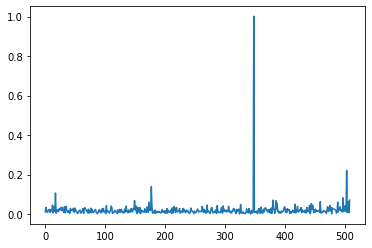

In [89]:
plt.plot(distances)

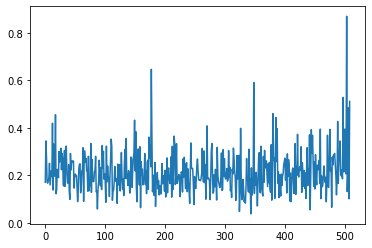

In [90]:
plt.plot(maes)

In [51]:
def calc_z_relative_mass(outputs, num_z_bins=20, z_bins=None):
    """
    Calculate z-relative mass from particle data.
    
    Args: 
        outputs: (df) Output data specified by output_col 
        num_z_bins: (int) Number of bins for z-axis linspace
        z_bins: (np array) Bin linspace along the z-axis
    
    Returns:
        z_mass: (np array) Particle mass distribution by hologram along z-axis
        z_bins: (np array) Bin linspace along the z-axis
    """
    
    if z_bins is None:
        z_bins = np.linspace(outputs["z"].min() - 100,
                             outputs["z"].max() + 100,
                             num_z_bins)
    else:
        num_z_bins = z_bins.size
    holograms = len(outputs["hid"].unique())
    z_mass = np.zeros((holograms, num_z_bins), dtype=np.float32)
    for i in range(outputs.shape[0]):
        z_pos = np.searchsorted(z_bins, outputs.loc[i, "z"], side="right") - 1
        mass = 4 / 3 * np.pi * (outputs.loc[i, "d"]/2)**3
        z_mass[int(outputs.loc[i, "hid"]) - 1, z_pos] += mass
    z_mass /= np.expand_dims(z_mass.sum(axis=1), -1)
    return z_mass, z_bins